k-NN classifier on digits

In [4]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import load_digits 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [5]:
digits = load_digits()
X, y = digits.data, digits.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
knn = KNeighborsClassifier(n_neighbors=5, weights="distance")
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.9667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.92      0.97      0.95        36
           2       0.95      1.00      0.97        35
           3       1.00      1.00      1.00        37
           4       0.97      0.94      0.96        36
           5       1.00      0.97      0.99        37
           6       0.97      1.00      0.99        36
           7       0.92      1.00      0.96        36
           8       0.97      0.89      0.93        35
           9       0.97      0.89      0.93        36

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



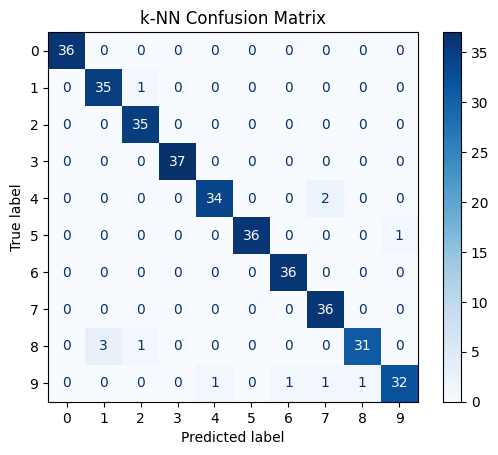

In [7]:
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot(cmap="Blues", values_format="d")
plt.title("k-NN Confusion Matrix")
plt.show()

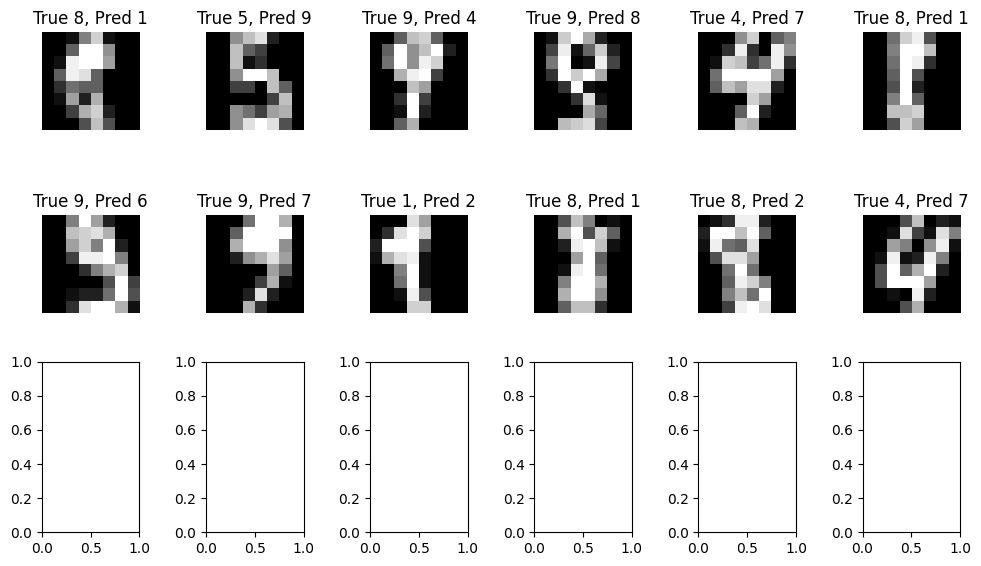

In [8]:
mis_idx = np.where(y_test != y_pred)[0]
fig, axes = plt.subplots(3, 6, figsize=(10,6))
axes = axes.flatten()

for ax, idx in zip(axes, mis_idx[:len(axes)]):
    ax.imshow(X_test[idx].reshape(8, 8), cmap="gray")
    ax.set_title(f"True {y_test[idx]}, Pred {y_pred[idx]}")
    ax.axis("off")

plt.tight_layout()
plt.show()